In [1]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [2]:
def get_SIFT_features(in_img):
    #sift = cv2.SIFT_create()
    
    # Convert the training image to RGB
    training_image = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)

    # Convert the training image to gray scale
    training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
    train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
    
    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)
    
    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size,
                      color=(0, 255, 0))
    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    SIFT_image_KPWS = keypoints_with_size - training_image
    SIFT_image_KPWTHOUTS = keypoints_without_size - training_image

    return  SIFT_image_KPWS, SIFT_image_KPWTHOUTS

In [15]:
def to_sift_df(
    df,
    save_path_wkp,
    save_path_wokp
):
    df = df.copy()
    df2 = df.copy()

    # Iterate through the rows of the DF and replace image with hog image
    prev_progress =0
    i = 0
    for index, row in df.iterrows():
        #if index > 30:
        #    break
        img = np.array(row["image"])

        img_SIFT_With_KP, img_SIFT_Without_KP = get_SIFT_features(img)    

        df.loc[index]["image"] = (img_SIFT_With_KP)
        df2.loc[index]["image"] = (img_SIFT_Without_KP)


        # show progress
        i=i+1
        cur_progress = int((i+1)*100/20000)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            prev_progress = cur_progress

    df.to_pickle(save_path_wkp)
    df2.to_pickle(save_path_wokp)
    
    return df, df2

In [3]:
from nebula.common import write_pickle, read_pickle, display

In [14]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df.pkl'
siftwkp_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_siftwkp.pkl'
siftwokp_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_siftwokp.pkl'

In [5]:
df = read_pickle(image_pickle_path)

In [8]:
sift = cv2.SIFT_create()

In [9]:
sift_kpws, sift_kpwos = get_SIFT_features(df["image"].iloc[0])

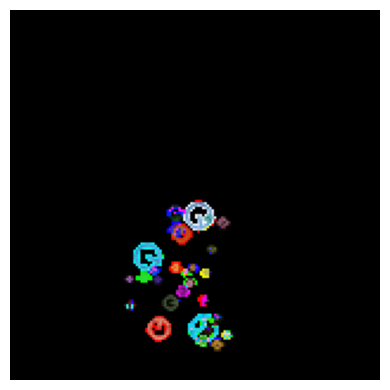

In [10]:
display(sift_kpws)

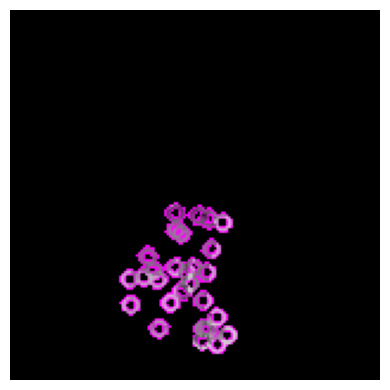

In [11]:
display(sift_kpwos)

In [16]:
siftwkp_df, siftwokp_df = to_sift_df(df, siftwkp_pickle_path, siftwokp_pickle_path)

progress: 2%
progress: 4%
progress: 6%
progress: 8%
progress: 10%
progress: 12%
progress: 14%
progress: 16%
progress: 18%
progress: 20%
progress: 22%
progress: 24%
progress: 26%
progress: 28%
progress: 30%
progress: 32%
progress: 34%
progress: 36%
progress: 38%
progress: 40%
progress: 42%
progress: 44%
progress: 46%
progress: 48%
progress: 50%
progress: 52%
progress: 54%
progress: 56%
progress: 58%
progress: 60%
progress: 62%
progress: 64%
progress: 66%
progress: 68%
progress: 70%
progress: 72%
progress: 74%
progress: 76%
progress: 78%
progress: 80%
progress: 82%
progress: 84%
progress: 86%
progress: 88%
progress: 90%
progress: 92%
progress: 94%
progress: 96%
progress: 98%
progress: 100%
